# Uber Analysis

### CONTENT
.Geography: USA, Sri Lanka and Pakistan
.Time Period: Jan-Dec 2016
.Unit of Analysis: Drives
.Total Drives:1,115
.Total Miles:12,204

The dataset contains the start day, end date, start location, end location, miles driven and purpose of driving(business, meals etc)


In [1]:
# Analysis and Mathematical Libraries
import numpy as np

import pandas as pd

# Visualisation Libraries

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Date,Time Libraries
import time,datetime

#Escape Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\ShapeAI\My Uber Drives - 2016.csv",encoding='latin-1')

In [3]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [4]:
df.columns=df.columns.str.replace("*","")

In [5]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df.shape

(1156, 7)

In [8]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


### Handling Missing Values

In [9]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

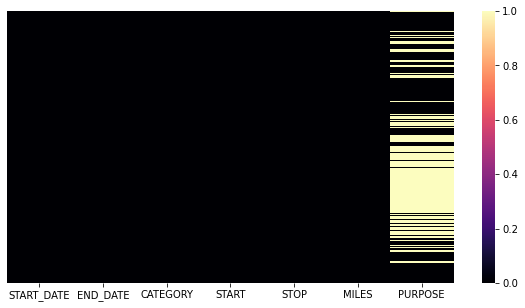

In [10]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False)
plt.show()

In [12]:
!pip install missingno 

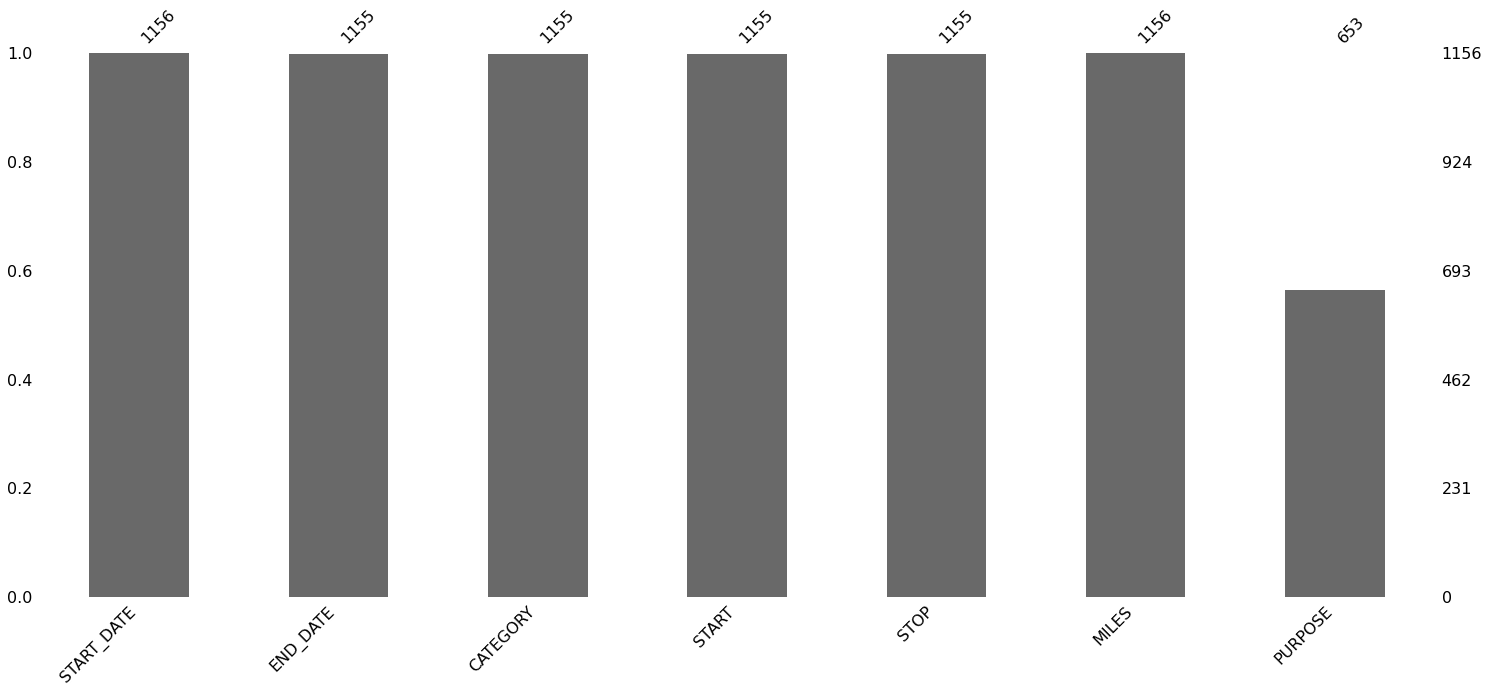

In [11]:
import missingno as msno
msno.bar(df)
plt.show()

In [12]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [13]:
df.drop(index=1155,axis=0,inplace=True)

In [14]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [15]:
df["PURPOSE"].isnull().sum()/len(df)

0.43463203463203465

In [16]:
df['PURPOSE'].fillna(method='ffill',inplace=True)

In [17]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [18]:
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [19]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site


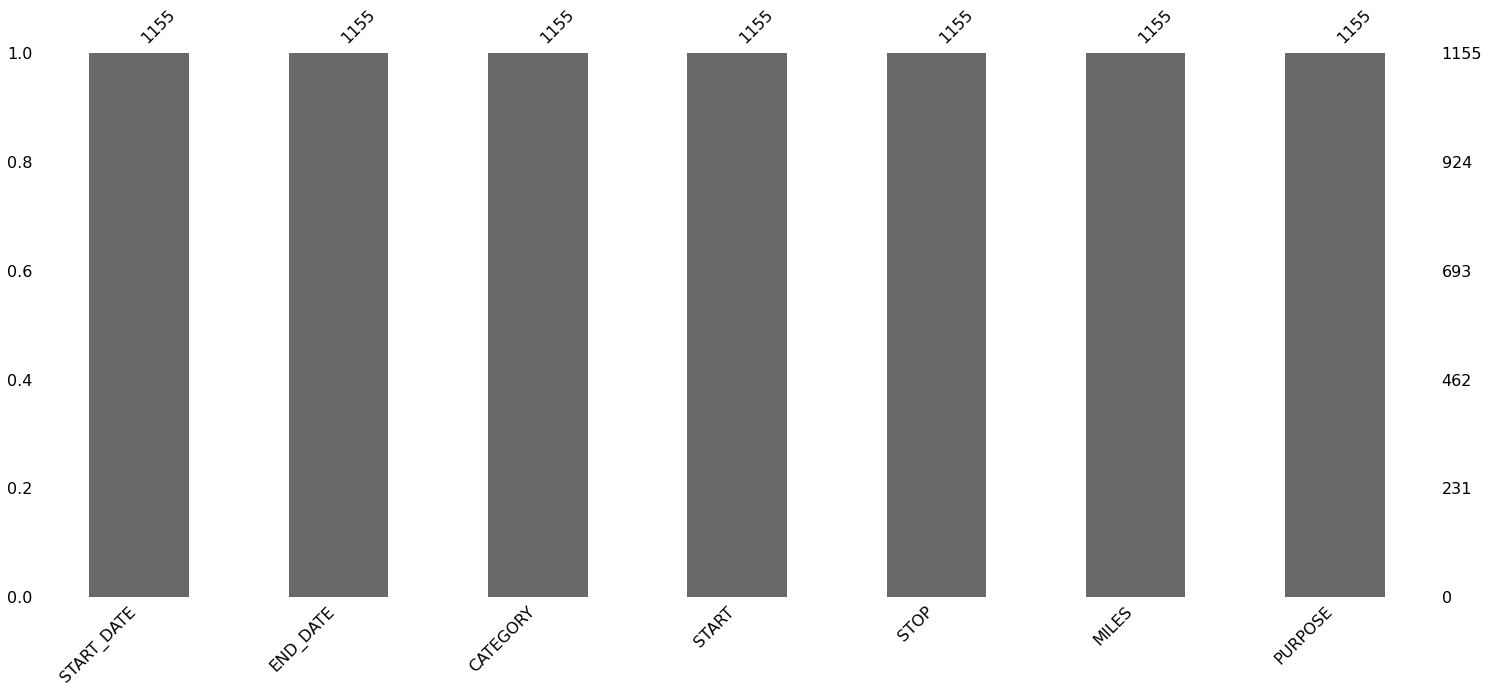

In [20]:
import missingno as msno
msno.bar(df)
plt.show()

In [21]:
category=pd.crosstab(df['CATEGORY'],columns='Different types of travel reasons')
category

col_0,Different types of travel reasons
CATEGORY,
Business,1078
Personal,77


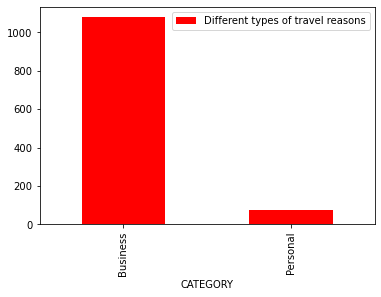

In [22]:
category.plot(kind='bar',color='r')
plt.legend()

In [23]:
start_point=df.START.value_counts()
start_point
print(start_point[start_point>10])

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: START, dtype: int64


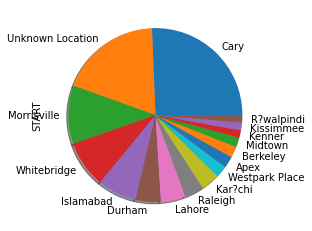

In [24]:
start_point[start_point>10].plot(kind='pie',shadow=True)
plt.show()

In [25]:
print(start_point[start_point<=10])

New Orleans       10
Emeryville        10
Downtown           9
Edgehill Farms     8
Central            8
                  ..
Florence           1
Ridgeland          1
Daytona Beach      1
Sky Lake           1
Gampaha            1
Name: START, Length: 161, dtype: int64


In [26]:
stop_point=df.STOP.value_counts()
stop_point
print(stop_point[stop_point>10])

Cary                203
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Durham               36
Lahore               36
Raleigh              29
Kar?chi              26
Apex                 17
Berkeley             16
Westpark Place       16
R?walpindi           13
Kissimmee            12
Midtown              11
Name: STOP, dtype: int64


In [27]:
print(stop_point[stop_point<=10])

Edgehill Farms       10
New Orleans          10
Kenner               10
Emeryville            9
Central               9
                     ..
Daytona Beach         1
Sand Lake Commons     1
Sky Lake              1
Vista East            1
Ilukwatta             1
Name: STOP, Length: 173, dtype: int64


In [28]:
miles=df.MILES.value_counts()
miles
print(miles[miles>10])

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
2.5     19
1.7     18
1.8     18
2.2     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
5.5     14
1.4     14
1.6     13
7.9     13
2.7     12
2.3     12
6.2     12
5.7     12
2.9     12
1.5     12
6.0     11
4.9     11
7.7     11
5.1     11
1.0     11
Name: MILES, dtype: int64


In [29]:
print(miles[miles<=10])

8.4     10
8.7     10
3.9     10
3.6     10
5.3     10
        ..
46.9     1
40.2     1
16.6     1
19.3     1
48.2     1
Name: MILES, Length: 226, dtype: int64


<AxesSubplot:>

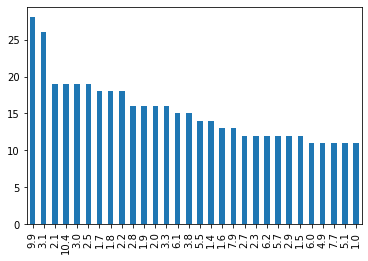

In [30]:
miles[miles>10].plot(kind='bar')

col_0,Miles Travelled
MILES,
False,840
True,315


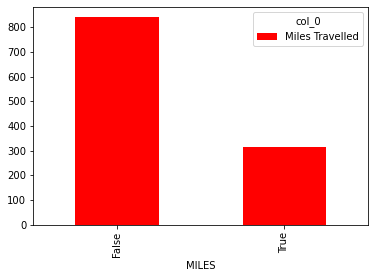

In [31]:
miles=pd.crosstab(index=df['MILES']>10,columns='Miles Travelled')
miles.plot(kind='bar',color='r')
miles

In [32]:
print(df.PURPOSE.value_counts())

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64


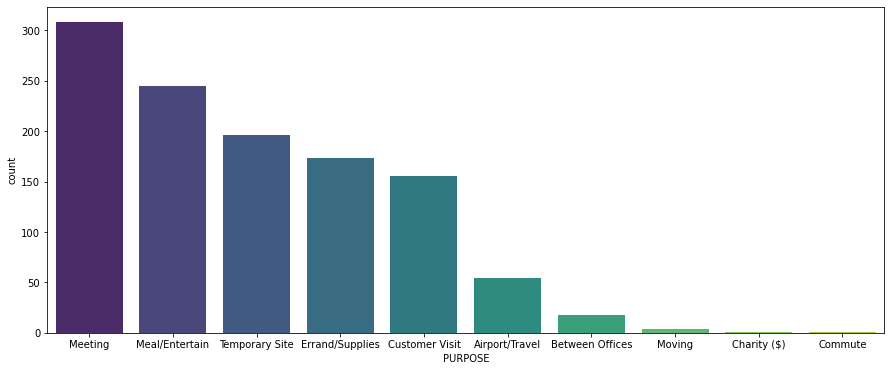

In [33]:
plt.figure(figsize=(15,6))
sns.countplot(df['PURPOSE'],order=df['PURPOSE'].value_counts().index,palette='viridis')
plt.show()

Lets calculate the duration

In [34]:
df['duration']=df.END_DATE-df.START_DATE
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,0 days 00:07:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0 days 00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00


In [35]:
df['duration']=df['duration'].dt.total_seconds()/60
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0


grouping purpose by miles

In [38]:
pd.DataFrame({'Mean':df.groupby(['PURPOSE'])['MILES'].mean(),
              'Min':df.groupby(['PURPOSE'])['MILES'].min(),
              'Max':df.groupby(['PURPOSE'])['MILES'].max()}).reset_index()


,PURPOSE,Mean,Min,Max
0,Airport/Travel,14.953704,0.9,156.9
1,Between Offices,10.944444,1.9,39.2
2,Charity ($),15.100000,15.1,15.1
3,Commute,180.200000,180.2,180.2
4,Customer Visit,16.065806,0.6,310.3
5,Errand/Supplies,5.928902,0.5,195.3
6,Meal/Entertain,5.773878,0.6,36.5
7,Meeting,12.652597,0.7,201.0
8,Moving,4.550000,3.3,6.1
9,Temporary Site,11.016327,0.7,195.6


Box plot of Miles and Duration

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

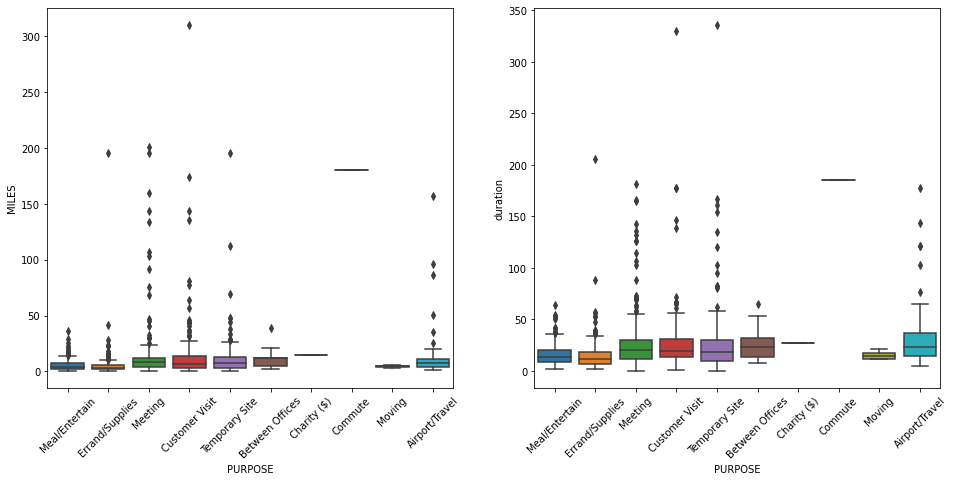

In [47]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.duration)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

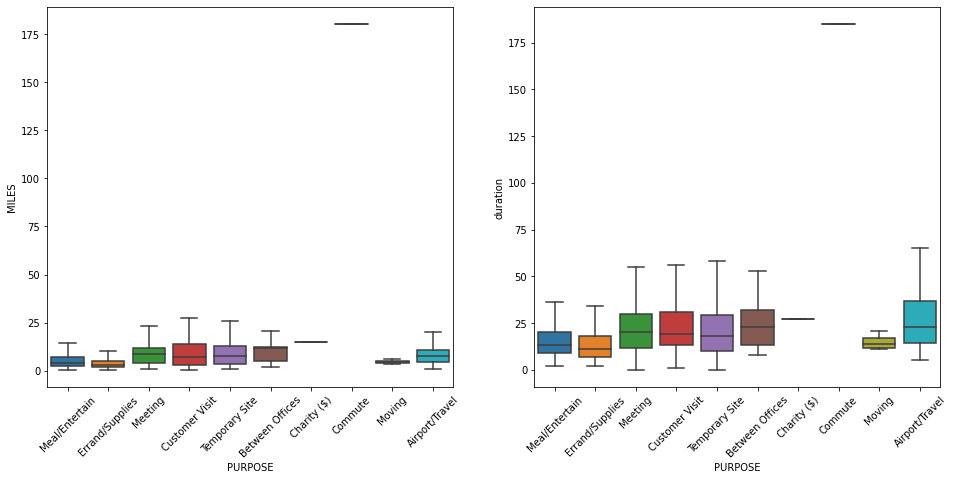

In [49]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,x=df.PURPOSE,y=df.MILES,showfliers=False)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.boxplot(data=df,x=df.PURPOSE,y=df.duration,showfliers=False)
plt.xticks(rotation=45)

Checking how many round trips are there(same start and end points)

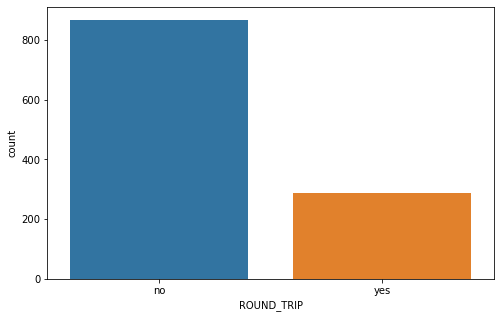

In [52]:
plt.figure(figsize=(8,5))
def round(x):
    if x['START']==x['STOP']:
        return 'yes'
    else:
        return 'no'
df['ROUND_TRIP']=df.apply(round,axis=1)
df
sns.countplot(df['ROUND_TRIP'],order=df['ROUND_TRIP'].value_counts().index)
plt.show()

Entering month name and evaluating frequency of trips in each month

In [54]:
df['month']=pd.DatetimeIndex(df['START_DATE']).month
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,duration,ROUND_TRIP,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,1
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,1
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,1
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes,12
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,12
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,12
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,12


In [55]:
dic={1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'}
df['month']=df['month'].map(dic)
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,duration,ROUND_TRIP,month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,6.0,yes,jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,12.0,yes,jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,13.0,yes,jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,14.0,yes,jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,67.0,no,jan
...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,7.0,yes,dec
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,18.0,no,dec
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,35.0,yes,dec
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,18.0,no,dec


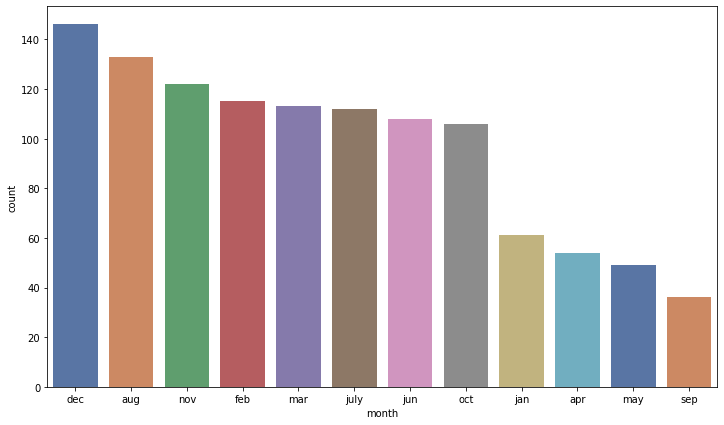

In [74]:
plt.figure(figsize=(12,7))
sns.countplot(df['month'], order=df['month'].value_counts().index,palette='deep')
plt.show()

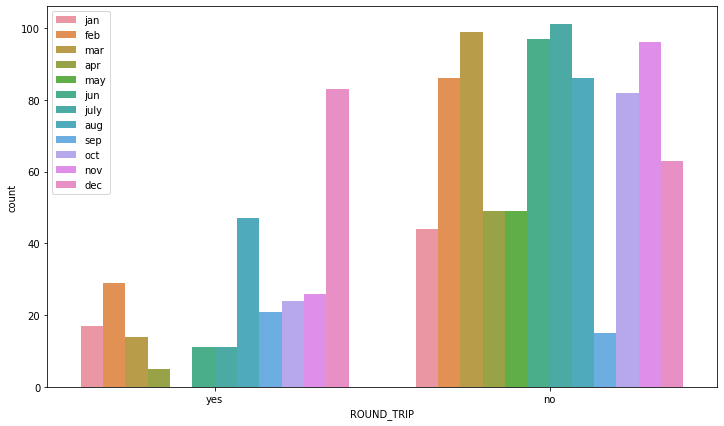

In [79]:
plt.figure(figsize=(12,7))
sns.countplot(df['ROUND_TRIP'],hue=df['month'])
plt.legend()
plt.show()

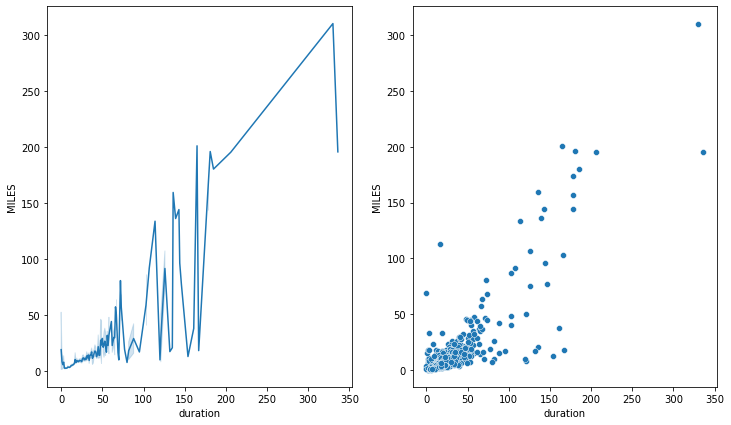

In [83]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.lineplot(data=df,x=df['duration'],y=df['MILES'])
plt.subplot(1,2,2)
sns.scatterplot(data=df,x=df['duration'],y=df['MILES'])
plt.show()

Distribution of cab rides based on category

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'Errand/Supplies'),
  Text(2, 0, 'Meeting'),
  Text(3, 0, 'Customer Visit'),
  Text(4, 0, 'Temporary Site'),
  Text(5, 0, 'Between Offices'),
  Text(6, 0, 'Charity ($)'),
  Text(7, 0, 'Commute'),
  Text(8, 0, 'Moving'),
  Text(9, 0, 'Airport/Travel')])

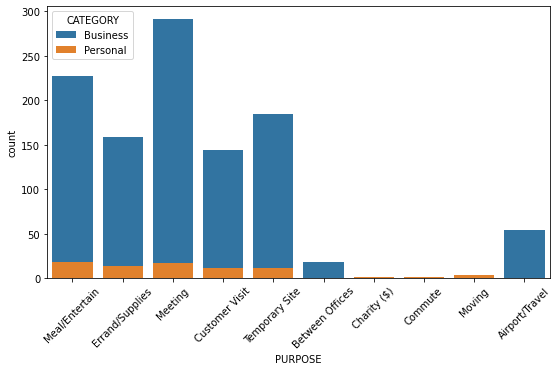

In [90]:
plt.figure(figsize=(9,5))
sns.countplot(data=df,x=df['PURPOSE'],hue=df['CATEGORY'],dodge=False)
plt.xticks(rotation=45)

Where do customers frequently take cabs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Westpark Place'),
  Text(10, 0, 'Apex'),
  Text(11, 0, 'Berkeley'),
  Text(12, 0, 'Midtown'),
  Text(13, 0, 'Kenner'),
  Text(14, 0, 'Kissimmee'),
  Text(15, 0, 'R?walpindi'),
  Text(16, 0, 'New Orleans'),
  Text(17, 0, 'Emeryville'),
  Text(18, 0, 'Downtown'),
  Text(19, 0, 'Edgehill Farms'),
  Text(20, 0, 'Central'),
  Text(21, 0, 'Colombo'),
  Text(22, 0, 'Orlando'),
  Text(23, 0, 'San Francisco'),
  Text(24, 0, 'Banner Elk')])

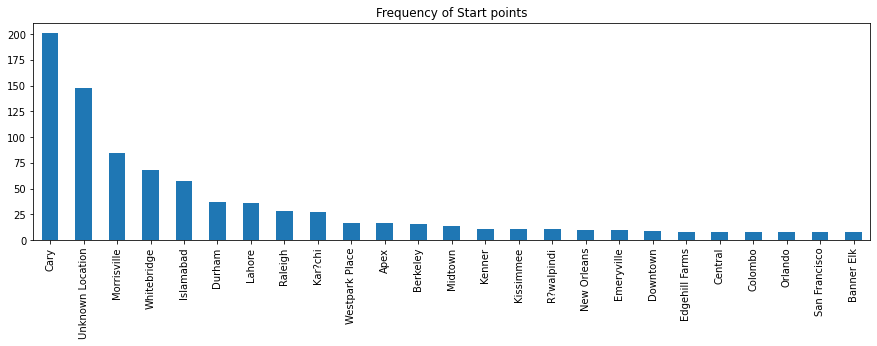

In [92]:
plt.figure(figsize=(15,4))
pd.Series(data=df['START']).value_counts()[:25].plot(kind='bar')
plt.title("Frequency of Start points")
plt.xticks(rotation=90)

Frequency of Stop Points

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Cary'),
  Text(1, 0, 'Unknown Location'),
  Text(2, 0, 'Morrisville'),
  Text(3, 0, 'Whitebridge'),
  Text(4, 0, 'Islamabad'),
  Text(5, 0, 'Durham'),
  Text(6, 0, 'Lahore'),
  Text(7, 0, 'Raleigh'),
  Text(8, 0, 'Kar?chi'),
  Text(9, 0, 'Apex'),
  Text(10, 0, 'Berkeley'),
  Text(11, 0, 'Westpark Place'),
  Text(12, 0, 'R?walpindi'),
  Text(13, 0, 'Kissimmee'),
  Text(14, 0, 'Midtown'),
  Text(15, 0, 'Edgehill Farms'),
  Text(16, 0, 'New Orleans'),
  Text(17, 0, 'Kenner'),
  Text(18, 0, 'Emeryville'),
  Text(19, 0, 'Central'),
  Text(20, 0, 'Banner Elk'),
  Text(21, 0, 'Colombo'),
  Text(22, 0, 'Oakland'),
  Text(23, 0, 'San Francisco'),
  Text(24, 0, 'The Drag')])

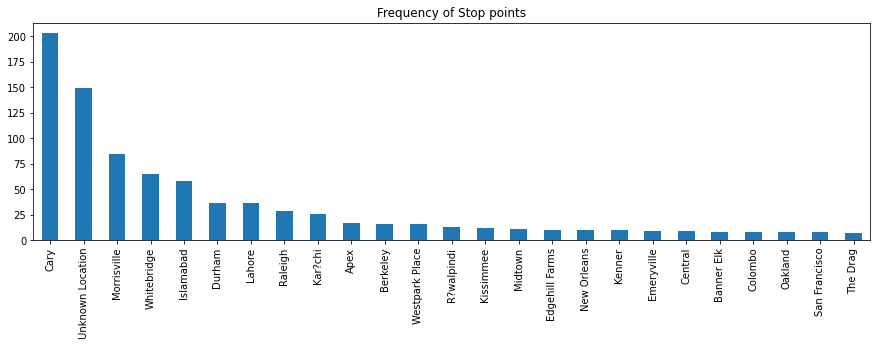

In [95]:
plt.figure(figsize=(15,4))
pd.Series(data=df['STOP']).value_counts()[:25].plot(kind='bar')
plt.title("Frequency of Stop points")
plt.xticks(rotation=90)

# Conclusions
1. Business cabs were used more frequently and travelled more
2. Round Trips occured most frequently in the month of December
3. December can be considered most profitable for private cab companies as fare prices could be icreases due to increase in demand.
4. There is seasonal pattern
5. Cab Traffic was high in a few cities only 
6. Most cab rides are within 35km which take about 30 mins or so.
7. Cabs to the airport take more time than usual